In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2
import seaborn as sns

matplotlib.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from homer_preprocessing import import_homer_diffgene
from plotting_scripts import plot_exp_rpkm, gene_list_bar_plot

In [2]:
workingDirectory = '/home/h1bennet/strains_rna/results/WL00b_Strains_Control_Young_WholeLiver/'
controlDirectory = '/home/h1bennet/strains/data/RNA/control_wholeliver_young/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)


    
    makeMultiWigHub.pl hrb_strains_qc_wholeliver_young_rna mm10 \
    -gradient 252,146,114 103,0,13 \
    -force -d /home/h1bennet/strains/data/RNA/control_wholeliver_young/aj_M_WholeLiver_RNA_polyA_control_untreated_AJcA_HBENN_l20210523_ATATCTCG_ATCTTAGT.aj.star_shifted_from_AJ.sam \
    /home/h1bennet/strains/data/RNA/control_wholeliver_young/aj_M_WholeLiver_RNA_polyA_control_untreated_AJcB_HBENN_l20210523_GCGCTCTA_GCTCCGAC.aj.star_shifted_from_AJ.sam \
    /home/h1bennet/strains/data/RNA/control_wholeliver_young/aj_M_WholeLiver_RNA_polyA_control_untreated_AJcC_HBENN_l20210523_AACAGGTT_ATACCAAG.aj.star_shifted_from_AJ.sam \
    /home/h1bennet/strains/data/RNA/control_wholeliver_young/balbcj_M_WholeLiver_RNA_polyA_control_untreated_BALBcA_HBENN_l20210523_GGTGAACC_GCGTTGGA.balbcj.star_shifted_from_BALBCJ.sam \
    /home/h1bennet/strains/data/RNA/control_wholeliver_young/balbcj_M_WholeLiver_RNA_polyA_control_untreated_BALBcB_HBENN_l20210523_CAACAATG_CTTCACGG.balbcj.star_shifted_from_BALBCJ.sam \
    /home/h1bennet/strains/data/RNA/control_wholeliver_young/balbcj_M_WholeLiver_RNA_polyA_control_untreated_BALBcC_HBENN_l20210523_TGGTGGCA_TCCTGTAA.balbcj.star_shifted_from_BALBCJ.sam \
    /home/h1bennet/strains/data/RNA/control_wholeliver_young/c57bl6j_M_WholeLiver_RNA_polyA_control_untreated_C57cA_HBENN_l20210523_AGGCAGAG_AGAATGCC \
    /home/h1bennet/strains/data/RNA/control_wholeliver_young/c57bl6j_M_WholeLiver_RNA_polyA_control_untreated_C57cB_HBENN_l20210523_GAATGAGA_GAGGCATT \
    /home/h1bennet/strains/data/RNA/control_wholeliver_young/c57bl6j_M_WholeLiver_RNA_polyA_control_untreated_C57cC_HBENN_l20210523_CAATTAAC_CGAGATAT \
    /home/h1bennet/strains/data/RNA/control_wholeliver_young/b6af1j_M_WholeLiver_RNA_polyA_control_untreated_B6AcA_HBENN_l20210523_TGGCCGGT_TAGAGCGC \
    /home/h1bennet/strains/data/RNA/control_wholeliver_young/b6af1j_M_WholeLiver_RNA_polyA_control_untreated_B6AcB_HBENN_l20210523_AGTACTCC_AACCTGTT \
    /home/h1bennet/strains/data/RNA/control_wholeliver_young/b6af1j_M_WholeLiver_RNA_polyA_control_untreated_B6AcC_HBENN_l20210523_GACGTCTT_GGTTCACC \
    /home/h1bennet/strains/data/RNA/control_wholeliver_young/cb6f1j_M_WholeLiver_RNA_polyA_control_untreated_CB6cA_HBENN_l20210523_TGCGAGAC_CATTGTTG \
    /home/h1bennet/strains/data/RNA/control_wholeliver_young/cb6f1j_M_WholeLiver_RNA_polyA_control_untreated_CB6cB_HBENN_l20210523_CATAGAGT_TGCCACCA \
    /home/h1bennet/strains/data/RNA/control_wholeliver_young/cb6f1j_M_WholeLiver_RNA_polyA_control_untreated_CB6cC_HBENN_l20210523_ACAGGCGC_CTCTGCCT 
    

* Afm - alternative promoter in AJ/BALB

# Run Oyoung's pipeline to process RNA-seq data consistantly.

In [3]:
c57_control_paths = list(np.sort(glob.glob(controlDirectory+'/c57*')))
balbc_control_paths = list(np.sort(glob.glob(controlDirectory+'/balb*')))
aj_control_paths = list(np.sort(glob.glob(controlDirectory+'/aj*')))

c57_control_ids = [i.split('/')[-1].split('_')[7] for i in c57_control_paths]
balbc_control_ids = [i.split('/')[-1].split('_')[7] for i in balbc_control_paths]
aj_control_ids = [i.split('/')[-1].split('_')[7] for i in aj_control_paths]

Put together into three separate comparisons

In [4]:
ids = ['c57_wholeliver_control_young',
       'balbc_wholeliver_control_young',
       'aj_wholeliver_control_young',
      ]

colors = ['#74c476',
          '#6baed6',
          '#de2d26',
         ]

paths = [';'.join(c57_control_paths),
         ';'.join(balbc_control_paths),
         ';'.join(aj_control_paths),
        ]

short_ids = [';'.join(c57_control_ids),
             ';'.join(balbc_control_ids),
             ';'.join(aj_control_ids),
            ]

pd.DataFrame([ids,colors,paths,short_ids]).T.to_csv('./sampleDef.txt',
                                                    sep='\t',
                                                    header=False,
                                                    index=False)

In [5]:
pd.DataFrame([ids,colors,paths,short_ids]).T

,0,1,2,3
0,c57_wholeliver_control_young,#74c476,/home/h1bennet/strains/data/RNA/control_wholel...,C57cA;C57cB;C57cC
1,balbc_wholeliver_control_young,#6baed6,/home/h1bennet/strains/data/RNA/control_wholel...,BALBcA;BALBcB;BALBcC
2,aj_wholeliver_control_young,#de2d26,/home/h1bennet/strains/data/RNA/control_wholel...,AJcA;AJcB;AJcC


# Run O'young RNA pipeline

Run the code below in BASH.
Edited for this pipeline to lower the minimum TPM threshold as this has kind of messed up our differential gene calling for borderline genes that do not meet the TPM in two of the strains ie TPM > 8 in one strain and TPM of 7 in the other two.

    source activate r-ouyangPipe
    
    mkdir ./expression/
    
    mkdir ./differential/
    
    rnaQuan.R ./sampleDef.txt -o ./expression/

    rnaDiff.R ./sampleDef.txt -c ./expression/rawC.txt \
    -t ./expression/rawT.txt -m 4 -o ./differential/

    # annotate scatter files with tag counts
    for scatter in ./differential/*scatter.txt;
    do diff2Homer.R -d $scatter -q ./expression/HOMER.rawTPM.txt;
    done

### Make sure to check the PCA pdf file for outliers

## Make jupyter hub for vizualization

    makeMultiWigHub.pl hrb_strains_viz_wholeliver_rna_amln_control_merged mm10 \
    -color 251,106,74 165,15,21 107,174,214 8,81,156 116,196,118 0,109,44 \
    -d ./expression/mergeTag/aj_wholeliver_control_young/ \
    ./expression/mergeTag/aj_wholeliver_amlndiet_30weeks/ \
    ./expression/mergeTag/balbc_wholeliver_control_young \
    ./expression/mergeTag/balbc_wholeliver_amlndiet_30weeks \
    ./expression/mergeTag/c57_wholeliver_control_young \
    ./expression/mergeTag/c57_wholeliver_amlndiet_30weeks

# Import differential gene files for examination and plotting

Make folder for figures

In [6]:
if not os.path.isdir('./figures/'):
    os.mkdir('./figures')

## Write differential genes to list for metascape

In [7]:
if not os.path.isdir('./gene_lists/'):
    os.mkdir('./gene_lists')

In [8]:
strains = ['aj', 'balb', 'c57']

log2fc = np.log2(2)
pval = 0.05
gene_list_dict ={}

In [10]:
for strain in strains:
    # initialize gene lists
    g_intersect = set()
    g_union = set()
    for i in glob.glob('./differential/'+strain+'*homer.txt'):
        print(i)
        # read in gene expression data
        df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
            depath=i,
            gepath='./expression/HOMER.rawTPM.txt',
            gene_name_index=True)

        # select differential genes
        df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
        sig_genes = df.index[(df['padj'] < pval) & (df['log2FoldChange'] <= -log2fc)].to_list()
        
        # add to sets
        if len(g_union) == 0:
            g_union = set(sig_genes)
            g_intersect = set(sig_genes)
        else:
            g_union = g_union.union(sig_genes)
            g_intersect = g_intersect.intersection(sig_genes)
        
        # print('union set length:', print(len(g_union)))
        # print('intersection set length:', print(len(g_intersect)))
    
    # after getting union and intersection sets add to dict
    gene_list_dict[strain+'_union'] = list(g_union)
    gene_list_dict[strain+'_intersection'] = list(g_intersect)
        

./differential/aj_wholeliver_control_young.vs.balbc_wholeliver_control_young.scatter.homer.txt
ge all transcripts (24940, 16)
Diff Gene selected transcripts (7844, 14)
ge selected transcripts (7844, 16)
./differential/aj_wholeliver_control_young.vs.c57_wholeliver_control_young.scatter.homer.txt
ge all transcripts (24940, 16)
Diff Gene selected transcripts (7833, 14)
ge selected transcripts (7833, 16)
./differential/balbc_wholeliver_control_young.vs.aj_wholeliver_control_young.scatter.homer.txt
ge all transcripts (24940, 16)
Diff Gene selected transcripts (7844, 14)
ge selected transcripts (7844, 16)
./differential/balbc_wholeliver_control_young.vs.c57_wholeliver_control_young.scatter.homer.txt
ge all transcripts (24940, 16)
Diff Gene selected transcripts (7983, 14)
ge selected transcripts (7983, 16)
./differential/c57_wholeliver_control_young.vs.aj_wholeliver_control_young.scatter.homer.txt
ge all transcripts (24940, 16)
Diff Gene selected transcripts (7833, 14)
ge selected transcripts

In [11]:
for key in gene_list_dict.keys():
    print(key)
    print(len(gene_list_dict[key]), 'genes')
    with open('./gene_lists/'+key+'_wholeliver_genes_fc_'+str(log2fc)+'_pval_'+str(pval)+'.txt', 'w') as f:
        f.write('Gene\n')
        for i in gene_list_dict[key]:
            f.write(i+'\n')
        f.close()

aj_union
298 genes
aj_intersection
58 genes
balb_union
293 genes
balb_intersection
75 genes
c57_union
299 genes
c57_intersection
84 genes


In [12]:
groups = [[0,1,2],
          [3,4,5],
          [6,7,8]]

group_labels = ['C57BL/6J Control young',
                'AJ Control young',
                'C57BL/6J Control young']

colors = ['#de2d26',
          '#6baed6',
          '#74c476']

### Pull sets for manual examination

activated genes

# Plot potential nichenet ligands

In [13]:
tpm_mat = pd.read_csv('./expression/rawT.txt', sep='\t', index_col=0)

In [14]:
ligands = pd.read_csv('/home/h1bennet/data/gene_lists/nichenet_ligands.txt',
                      sep='\t')['x'].str.capitalize().tolist()
ligands[:5]

['Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl5', 'Ppbp']

Collect ALL activated NASH genes

In [15]:
act = []
for key in gene_list_dict.keys():
    if 'union' in key:
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)

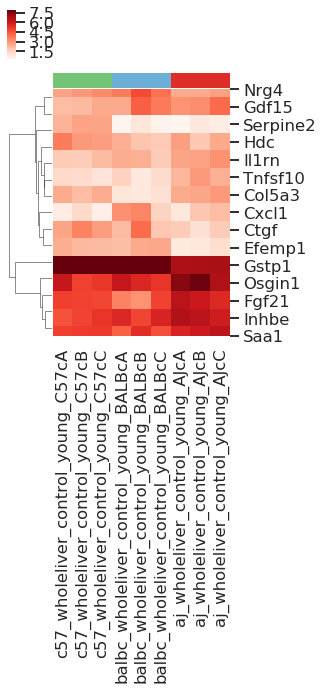

In [16]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    #z_score=0,
    cmap='Reds',
    #vmin=-2,
    vmax=8,
    col_colors = ['#74c476', '#74c476', '#74c476',
          '#6baed6', '#6baed6', '#6baed6',
          '#de2d26', '#de2d26', '#de2d26'],
    figsize=(4,6),
    yticklabels=1)

plt.savefig('./figures/diff_genes_union_ligands_clustermap.png', bbox_inches='tight')
# plt.close()

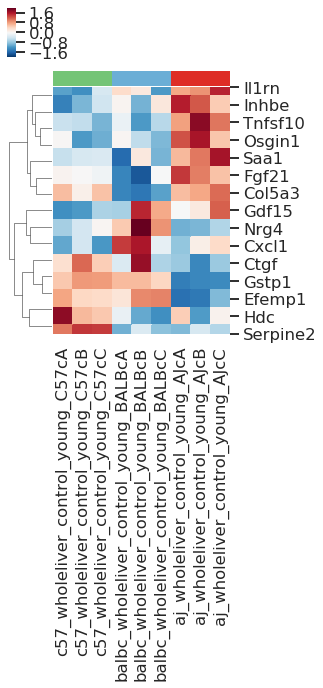

In [17]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    z_score=0,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    col_colors = ['#74c476', '#74c476', '#74c476',
          '#6baed6', '#6baed6', '#6baed6',
          '#de2d26', '#de2d26', '#de2d26'],
    figsize=(4,6),
    yticklabels=1)

plt.savefig('./figures/diff_genes_union_ligands_clustermap_zscore.png', bbox_inches='tight')
# plt.close()

# Plot genes for manual examination

In [18]:
tpm_mat.columns

Index(['c57_wholeliver_control_young_C57cA',
       'c57_wholeliver_control_young_C57cB',
       'c57_wholeliver_control_young_C57cC',
       'balbc_wholeliver_control_young_BALBcA',
       'balbc_wholeliver_control_young_BALBcB',
       'balbc_wholeliver_control_young_BALBcC',
       'aj_wholeliver_control_young_AJcA', 'aj_wholeliver_control_young_AJcB',
       'aj_wholeliver_control_young_AJcC'],
      dtype='object')

In [19]:
groups = [[0,1,2],
          [3,4,5],
          [6,7,8]]

group_labels = ['C57BL/6J Control young',
                'BALB/cJ Control young',
                'AJ Control young']

colors = ['#74c476',
          '#6baed6',
          '#de2d26']

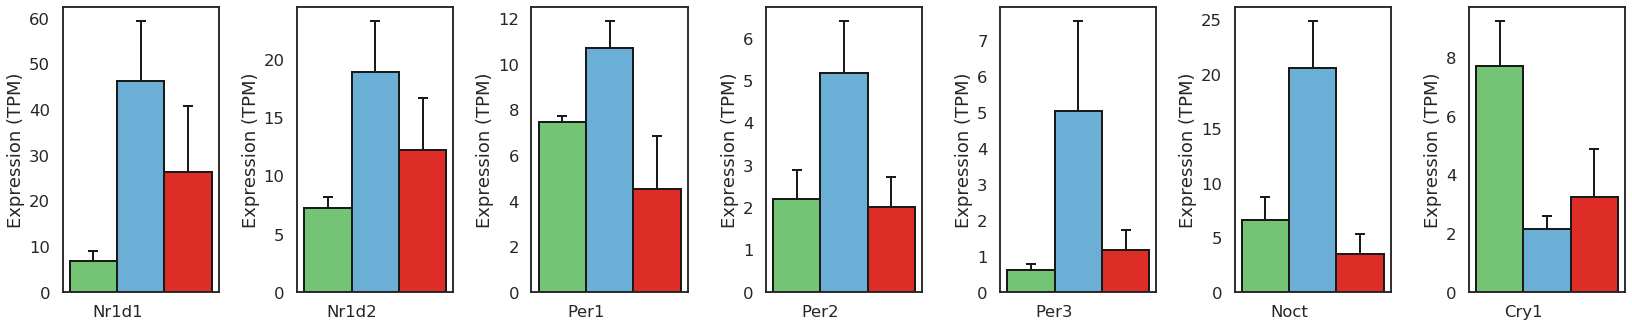

In [21]:
gene_list = ['Nr1d1', 'Nr1d2', 'Per1', 'Per2', 'Per3', 'Noct', 'Cry1']

fig, axs = plt.subplots(1, len(gene_list), figsize=(4*len(gene_list), 3*len(gene_list)/4))
plt.subplots_adjust(wspace=0.5)


for gene, ax in zip(gene_list, axs.flat):
    gene_list_bar_plot([gene],
                       tpm_mat,
                       groups=groups,
                       group_labels = group_labels,
                       colors = colors,
                       width = 0.15,
                       ax=ax)

    ax.get_legend().remove()

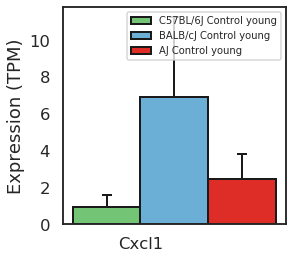

In [20]:
fig, ax = plt.subplots(figsize=(4, 4))

gene_list_bar_plot(['Cxcl1'],
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   ax=ax)

# ax.get_legend().remove()